In [ ]:
import pandas as pd
import sklearn
import numpy as np
import csv
from csv import reader
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv("train_data3.csv")
df.head()

,paciente,Jitter_local,Jitter_local_absolute,Jitter_rap,Jitter_ppq5,Jitter_ddp,Shimmer_local,Shimmer_localdB,Shimmer_apq3,Shimmer_apq5,...,Num_pulses,Num_periods,Mean_periods,Standard_deviation_period,Fraction_locally_unvoiced_frames,Num_voice_breaks,Degree_voice_breaks,UPDRS,Exame,Sick
0,40,471.0,0.000034,186.0,0.23,558.0,2793.0,0.26,1183.0,1.52,...,176,175,0.007179,0.000130,0.0,0,0.00,1,1,0
1,40,4319.0,0.000317,2774.0,1708.00,8322.0,13924.0,1195.00,8558.0,6036.00,...,258,256,0.007343,0.000312,2913.0,1,7038.00,1,2,0
2,40,1543.0,0.000103,1004.0,648.00,3012.0,17447.0,1694.00,11171.0,6851.00,...,426,425,0.006700,0.000108,351.0,0,0.00,1,3,0
3,40,2864.0,0.000212,1108.0,1147.00,3324.0,7692.0,1062.00,2555.0,4647.00,...,74,70,0.007405,0.000660,18056.0,2,6777.00,1,4,0
4,40,3878.0,0.000301,1795.0,1675.00,5386.0,11574.0,1212.00,3994.0,5.69,...,71,68,0.007766,0.001045,25333.0,2,11.75,1,5,0


In [ ]:
df.Sick

0       0
1       0
2       0
3       0
4       0
       ..
1035    1
1036    1
1037    1
1038    1
1039    1
Name: Sick, Length: 1040, dtype: int64

In [ ]:
##testando se o csv ficou arrumado##

In [ ]:
df.shape

(1040, 30)

In [ ]:
##Checando se tem duplicados

In [ ]:
sum(df.duplicated())

0

In [ ]:
df.shape

(1040, 30)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   paciente                          1040 non-null   int64  
 1   Jitter_local                      1040 non-null   float64
 2   Jitter_local_absolute             1040 non-null   float64
 3   Jitter_rap                        1040 non-null   float64
 4   Jitter_ppq5                       1040 non-null   float64
 5   Jitter_ddp                        1040 non-null   float64
 6   Shimmer_local                     1040 non-null   float64
 7   Shimmer_localdB                   1040 non-null   float64
 8   Shimmer_apq3                      1040 non-null   float64
 9   Shimmer_apq5                      1040 non-null   float64
 10  Shimmer_apq11                     1040 non-null   float64
 11  Shimmer_dda                       1040 non-null   float64
 12  AC    

In [ ]:
#apaga a coluna de pacientes ID
del df['paciente']
del df['UPDRS']
df.shape

(1040, 28)

In [ ]:
del df['Exame']

In [ ]:
#####################################################
#preparando os dados
#####################################################

In [ ]:
from sklearn.model_selection import train_test_split

def embaralha(x,y):
    X_aux, X_emb, y_aux, y_emb = train_test_split(x, y, test_size=0.95 ,shuffle=True)
    r = (len(x)-len(x)*0.95)
    X_emb = X_emb.append(X_aux.iloc[0:int(r)])
    y_emb = y_emb.append(y_aux)
    return (X_emb, y_emb)

def cria(x,y):
    X_aux, X_emb, y_aux, y_emb = train_test_split(x, y, test_size=0.95 ,shuffle=False)
    r = (len(x)-len(x)*0.95)
    X_emb = X_emb.append(X_aux.iloc[0:int(r)])
    y_emb = y_emb.append(y_aux)
    return (X_emb, y_emb)


In [ ]:
X_total, y_total = cria(df, df.Sick)

In [ ]:
y_total

52    0
53    0
54    0
55    0
56    0
     ..
47    1
48    1
49    1
50    1
51    1
Name: Sick, Length: 1040, dtype: int64

In [ ]:
# # 

# #pca = PCA(n_components=28)
# #principalComponents = pca.fit_transform(X_total)
# #principalDf = pd.DataFrame(data = principalComponents
# #             , columns = ['Jitter_local','Jitter_local_absolute','Jitter_rap','Jitter_ppq5',
#                           'Jitter_ddp','Shimmer_local','Shimmer_localdB','Shimmer_apq3','Shimmer_apq5',
#                           'Shimmer_apq11','Shimmer_dda','AC','NTH','HTN','Median_pitch','Mean_pitch',
#                           'Standard_deviation','Minimum_pitch','Maximum_pitch','Num_pulses','Num_periods',
#                           'Mean_periods','Standard_deviation_period','Fraction_locally_unvoiced_frames',
#                           'Num_voice_breaks','Degree_voice_breaks','Exame','Sick'])

In [ ]:
#principalDf

In [ ]:
#finalDf = pd.concat([principalDf, df['Sick']], axis = 1)

In [ ]:
#finalDf

In [ ]:
#Teste = grupo 1

In [ ]:

X_test, X_train, y_test, y_train = train_test_split(df, df.Sick, test_size=0.75 ,shuffle=False)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(780, 27) (780,)
(260, 27) (260,)


In [ ]:
X_test

,Jitter_local,Jitter_local_absolute,Jitter_rap,Jitter_ppq5,Jitter_ddp,Shimmer_local,Shimmer_localdB,Shimmer_apq3,Shimmer_apq5,Shimmer_apq11,...,Minimum_pitch,Maximum_pitch,Num_pulses,Num_periods,Mean_periods,Standard_deviation_period,Fraction_locally_unvoiced_frames,Num_voice_breaks,Degree_voice_breaks,Sick
0,471.00,0.000034,186.00,0.23,558.0,2793.0,0.26,1183.0,1.52,2576.00,...,132744.00,145.84,176,175,0.007179,0.000130,0.0,0,0.00,0
1,4319.00,0.000317,2774.00,1708.00,8322.0,13924.0,1195.00,8558.0,6036.00,8585.00,...,124543.00,165029.00,258,256,0.007343,0.000312,2913.0,1,7038.00,0
2,1543.00,0.000103,1004.00,648.00,3012.0,17447.0,1694.00,11171.0,6851.00,9395.00,...,141443.00,158612.00,426,425,0.006700,0.000108,351.0,0,0.00,0
3,2864.00,0.000212,1108.00,1147.00,3324.0,7692.0,1062.00,2555.0,4647.00,11916.00,...,113054.00,163011.00,74,70,0.007405,0.000660,18056.0,2,6777.00,0
4,3878.00,0.000301,1795.00,1675.00,5386.0,11574.0,1212.00,3994.0,5.69,13043.00,...,98623.00,162874.00,71,68,0.007766,0.001045,25333.0,2,11.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,5189.00,0.000396,2433.00,2904.00,7298.0,19593.0,1789.00,10638.0,12213.00,6105.00,...,94393.00,425219.00,48,45,0.007640,0.003399,33962.0,2,32435.00,1
256,6572.00,0.000713,2255.00,1772.00,6764.0,11705.0,1044.00,3.7,6.06,15491.00,...,74.76,111943.00,18,16,0.010846,0.001844,59459.0,1,41728.00,1
257,1076.00,0.000105,0.48,0.67,1441.0,11905.0,1044.00,5752.0,8969.00,11.49,...,95734.00,110272.00,26,25,0.009765,0.000489,10.0,0,0.00,1
258,4.49,0.000459,2449.00,1599.00,7346.0,18809.0,1766.00,7616.0,13887.00,14122.00,...,79811.00,117367.00,32,30,0.010220,0.000849,27273.0,1,16882.00,1


In [ ]:
#-------------------------------------

In [ ]:
#Teste = grupo 2

In [ ]:

X_test2, X_train2, y_test2, y_train2 = train_test_split(df, df.Sick, test_size=0.5 ,shuffle=False)

print(X_train2.shape, y_train2.shape)
print(X_test2.shape, y_test2.shape)

(520, 27) (520,)
(520, 27) (520,)


In [ ]:
X_aux, X_test2, y_aux, y_test2 = train_test_split(X_test2, y_test2, test_size=0.5 ,shuffle=False)
print(X_test2.shape, y_test2.shape)

(260, 27) (260,)


In [ ]:
X_train2 = X_aux.append(X_train2)
y_train2 = y_aux.append(y_train2)

In [ ]:
X_test2

,Jitter_local,Jitter_local_absolute,Jitter_rap,Jitter_ppq5,Jitter_ddp,Shimmer_local,Shimmer_localdB,Shimmer_apq3,Shimmer_apq5,Shimmer_apq11,...,Minimum_pitch,Maximum_pitch,Num_pulses,Num_periods,Mean_periods,Standard_deviation_period,Fraction_locally_unvoiced_frames,Num_voice_breaks,Degree_voice_breaks,Sick
260,553.0,0.000052,212.00,215.00,637.0,4055.00,0.40,1787.0,2611.00,4197.00,...,90259.00,120752.00,258,257,0.009348,0.000544,0.0,0,0.0,0
261,806.0,0.000075,149.00,259.00,448.0,5459.00,637.00,1802.0,3.21,6291.00,...,80223.00,119053.00,95,94,0.009335,0.000879,2222.0,0,0.0,0
262,482.0,0.000040,142.00,151.00,426.0,5.36,506.00,1731.0,2838.00,6808.00,...,97302.00,134813.00,167,165,0.008295,0.000629,725.0,1,1436.0,0
263,2036.0,0.000177,828.00,1229.00,2485.0,8123.00,906.00,3999.0,5369.00,7726.00,...,105004.00,123134.00,43,42,0.008682,0.000546,26531.0,0,0.0,0
264,2574.0,0.000230,1089.00,1401.00,3268.0,11389.00,1144.00,5026.0,7266.00,8849.00,...,91.84,125471.00,55,53,0.008917,0.000763,26562.0,1,25493.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,2889.0,0.000238,1.22,1.52,3659.0,15262.00,1.48,7064.0,8352.00,21693.00,...,84838.00,489918.00,38,34,0.008230,0.004264,41379.0,2,34268.0,1
516,2283.0,0.000161,1175.00,1265.00,3526.0,18213.00,1506.00,9236.0,11632.00,12553.00,...,84924.00,499912.00,58,45,0.007057,0.004475,38889.0,2,32558.0,1
517,2598.0,0.000298,1021.00,859.00,3063.0,11073.00,997.00,6086.0,5516.00,7674.00,...,74952.00,106678.00,25,24,0.011483,0.000895,34091.0,0,0.0,1
518,2633.0,0.000299,0.99,1072.00,2971.0,11.53,1015.00,4457.0,7028.00,13754.00,...,74882.00,101959.00,32,30,0.011360,0.001239,29091.0,1,20168.0,1


In [ ]:
#-------------------------------------

In [ ]:
#Teste = grupo 3

In [ ]:

X_train3, X_test3, y_train3, y_test3 = train_test_split(df, df.Sick, test_size=0.5 ,shuffle=False)

print(X_train3.shape, y_train3.shape)
print(X_test3.shape, y_test3.shape)

(520, 27) (520,)
(520, 27) (520,)


In [ ]:
X_test3, X_aux, y_test3, y_aux = train_test_split(X_test3, y_test3, test_size=0.5 ,shuffle=False)

print(X_test3.shape, y_test3.shape)
print(X_aux.shape, y_aux.shape)

(260, 27) (260,)
(260, 27) (260,)


In [ ]:
X_train3 = X_train3.append(X_aux)
y_train3 = y_train3.append(y_aux)

In [ ]:
X_test3

,Jitter_local,Jitter_local_absolute,Jitter_rap,Jitter_ppq5,Jitter_ddp,Shimmer_local,Shimmer_localdB,Shimmer_apq3,Shimmer_apq5,Shimmer_apq11,...,Minimum_pitch,Maximum_pitch,Num_pulses,Num_periods,Mean_periods,Standard_deviation_period,Fraction_locally_unvoiced_frames,Num_voice_breaks,Degree_voice_breaks,Sick
520,918.0,0.000067,408.0,532.0,1224.0,5093.0,477.00,2497.00,3079.0,4575.00,...,103925.0,145219.0,233,231,0.007287,0.000461,1765.0,0,0.0,0
521,384.0,0.000027,171.0,179.0,512.0,3351.0,0.32,1.80,1838.0,2512.00,...,128597.0,151512.0,179,178,0.006949,0.000210,1587.0,0,0.0,0
522,343.0,0.000023,131.0,164.0,394.0,3041.0,345.00,1247.00,1698.0,2601.00,...,134174.0,156943.0,170,169,0.006683,0.000228,12879.0,0,0.0,0
523,3721.0,0.000291,1557.0,1886.0,4672.0,5954.0,629.00,2267.00,3621.0,3709.00,...,102363.0,140899.0,40,39,0.007824,0.000727,9375.0,0,0.0,0
524,2394.0,0.000201,924.0,652.0,2773.0,7947.0,764.00,3031.00,4957.0,8714.00,...,102721.0,129269.0,32,30,0.008387,0.000477,26829.0,1,30704.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,3051.0,0.000142,1648.0,1889.0,4944.0,10262.0,966.00,3.21,4723.0,10221.00,...,176296.0,229673.0,104,103,0.004660,0.000334,21053.0,0,0.0,1
776,4973.0,0.000242,2115.0,2297.0,6344.0,15507.0,1536.00,5549.00,7243.0,14376.00,...,128206.0,239838.0,111,105,0.004867,0.000867,23611.0,1,6595.0,1
777,3135.0,0.000145,1651.0,1781.0,4952.0,9268.0,1002.00,3085.00,4427.0,12336.00,...,199557.0,239661.0,98,96,0.004633,0.000322,0.0,0,0.0,1
778,3446.0,0.000162,1674.0,2088.0,5022.0,14816.0,1246.00,5054.00,7278.0,13.35,...,176904.0,233876.0,95,94,0.004709,0.000368,3704.0,0,0.0,1


In [ ]:
#-------------------------------------

In [ ]:
#Teste = grupo 4

In [ ]:

X_train4, X_test4, y_train4, y_test4 = train_test_split(df, df.Sick, test_size=0.25 ,shuffle=False)

print(X_train4.shape, y_train4.shape)
print(X_test4.shape, y_test4.shape)

(780, 27) (780,)
(260, 27) (260,)


In [ ]:
X_test4

,Jitter_local,Jitter_local_absolute,Jitter_rap,Jitter_ppq5,Jitter_ddp,Shimmer_local,Shimmer_localdB,Shimmer_apq3,Shimmer_apq5,Shimmer_apq11,...,Minimum_pitch,Maximum_pitch,Num_pulses,Num_periods,Mean_periods,Standard_deviation_period,Fraction_locally_unvoiced_frames,Num_voice_breaks,Degree_voice_breaks,Sick
780,826.0,0.000057,244.0,314.0,733.00,6756.00,0.71,2401.0,3.13,8069.000000,...,125803.00,470707.00,158,155,0.006936,0.001340,17557.00,1,3342.0,0
781,636.0,0.000045,259.0,306.0,777.00,5871.00,574.00,2827.0,3202.00,4674.000000,...,132.08,159183.00,123,121,0.007076,0.000313,11.00,0,0.0,0
782,1251.0,0.000074,542.0,474.0,1627.00,4439.00,579.00,1482.0,2228.00,4.060000,...,75035.00,200.04,111,106,0.005889,0.001184,26136.00,1,5343.0,0
783,1726.0,0.000138,925.0,756.0,2774.00,9162.00,907.00,4037.0,5087.00,9.830000,...,119728.00,130653.00,38,37,0.007992,0.000238,24.39,0,0.0,0
784,3322.0,0.000266,1813.0,1574.0,5.44,10.73,1069.00,3848.0,4321.00,10846.000000,...,114426.00,135935.00,38,36,0.008003,0.000603,39216.00,1,28019.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035,1909.0,0.000103,786.0,577.0,2357.00,8885.00,833.00,4256.0,5.46,5.890000,...,168015.00,209393.00,40,38,0.005370,0.000366,62295.00,1,35053.0,1
1036,1992.0,0.000118,911.0,866.0,2733.00,19904.00,1713.00,11212.0,10396.00,11.297792,...,164103.00,178444.00,18,16,0.005910,0.000158,71111.00,1,54629.0,1
1037,1845.0,0.000100,1073.0,1096.0,3219.00,11451.00,1052.00,5815.0,6652.00,10227.000000,...,168042.00,207612.00,59,58,0.005399,0.000238,19512.00,0,0.0,1
1038,2345.0,0.000127,937.0,1173.0,2811.00,12952.00,1167.00,5976.0,8343.00,11774.000000,...,161786.00,227605.00,68,66,0.005418,0.000712,38983.00,1,12203.0,1


In [ ]:
#-------------------------------------

In [ ]:
#embaralhando (não embaralhar)
#X_train, y_train = embaralha(X_train, y_train)
#X_test, y_test = embaralha(X_test, y_test)

#X_train2, y_train2 = embaralha(X_train2, y_train2)
#X_test2, y_test2 = embaralha(X_test2, y_test2)

#X_train3, y_train3 = embaralha(X_train3, y_train3)
#X_test3, y_test3 = embaralha(X_test3, y_test3)

#X_train4, y_train4 = embaralha(X_train4, y_train4)
#X_test4, y_test4 = embaralha(X_test4, y_test4)


In [ ]:
#Normalizando os dados

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

X_train2 = sc.fit_transform(X_train2)
X_test2 = sc.fit_transform(X_test2)

X_train3 = sc.fit_transform(X_train3)
X_test3 = sc.fit_transform(X_test3)

X_train4 = sc.fit_transform(X_train4)
X_test4 = sc.fit_transform(X_test4)


In [ ]:
X_total = sc.fit_transform(X_total)

In [ ]:
#####################################################
#Aplicação SVM Linear
#####################################################

In [ ]:
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
## Aplicação de Hiperparâmetros GRUPO 1
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5]}

Grid = svm.SVC 
modelo_SvmLin = GridSearchCV(Grid(kernel='linear'), param_grid, cv=5)
modelo_SvmLin.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05,
                                   0.1, 0.5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
modelo_SvmLin.best_estimator_

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
#SVM Linear aplicado

modelo_SvmLin = svm.SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

modelo_SvmLin.fit(X_train, y_train)

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred_modelLin = modelo_SvmLin.predict(X_test)
y_pred_modelLin

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
## Aplicação de Hiperparâmetros GRUPO 2
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5]}

Grid = svm.SVC 
modelo_SvmLin2 = GridSearchCV(Grid(kernel='linear'), param_grid, cv=5)
modelo_SvmLin2.fit(X_train2, y_train2)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05,
                                   0.1, 0.5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
modelo_SvmLin2.best_estimator_

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
#SVM Linear aplicado

modelo_SvmLin2 = svm.SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

modelo_SvmLin2.fit(X_train2, y_train2)

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred_Lin2 = modelo_SvmLin2.predict(X_test2)

In [ ]:
y_pred_modelLin = np.append(y_pred_modelLin, y_pred_Lin2)
y_pred_modelLin

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
## Aplicação de Hiperparâmetros GRUPO 3
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5]}

Grid = svm.SVC 
modelo_SvmLin3 = GridSearchCV(Grid(kernel='linear'), param_grid, cv=5)
modelo_SvmLin3.fit(X_train3, y_train3)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05,
                                   0.1, 0.5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
modelo_SvmLin3.best_estimator_

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
#SVM Linear aplicado

modelo_SvmLin3 = svm.SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

modelo_SvmLin3.fit(X_train3, y_train3)

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred_Lin3 = modelo_SvmLin3.predict(X_test3)

In [ ]:
y_pred_modelLin = np.append(y_pred_modelLin, y_pred_Lin3)
y_pred_modelLin

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
## Aplicação de Hiperparâmetros GRUPO 4
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5]}

Grid = svm.SVC 
modelo_SvmLin4 = GridSearchCV(Grid(kernel='linear'), param_grid, cv=5)
modelo_SvmLin4.fit(X_train4, y_train4)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05,
                                   0.1, 0.5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
modelo_SvmLin4.best_estimator_

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
#SVM Linear aplicado

modelo_SvmLin4 = svm.SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

modelo_SvmLin4.fit(X_train4, y_train4)

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred_Lin4 = modelo_SvmLin4.predict(X_test4)

In [ ]:
y_pred_modelLin = np.append(y_pred_modelLin, y_pred_Lin4)
y_pred_modelLin

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
###########
y_pred_modelLin.shape

(1040,)

In [ ]:
# Acurácia
print("Acurácia com K-fold SVM POlinomial:", accuracy_score(y_total, y_pred_modelLin))

Acurácia com K-fold SVM POlinomial: 1.0


In [ ]:
print(confusion_matrix(y_total, y_pred_modelLin))
print(classification_report(y_total, y_pred_modelLin))
print("Acurácia Polinomial:", accuracy_score(y_total, y_pred_modelLin))

[[520   0]
 [  0 520]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       520
           1       1.00      1.00      1.00       520

    accuracy                           1.00      1040
   macro avg       1.00      1.00      1.00      1040
weighted avg       1.00      1.00      1.00      1040

Acurácia Polinomial: 1.0


In [ ]:
#####################################################
#Aplicação SVM Polinomial
#####################################################

In [ ]:
## Aplicação de Hiperparâmetros GRUPO 1
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5]}

Grid = svm.SVC 
modelo_SvmPoly = GridSearchCV(Grid(kernel='poly'), param_grid, cv=5)
modelo_SvmPoly.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='poly', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05,
                                   0.1, 0.5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
modelo_SvmPoly.best_estimator_

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
#SVM polinomial aplicado

modelo_SvmPoly = svm.SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

modelo_SvmPoly.fit(X_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred_modelPoly= modelo_SvmPoly.predict(X_test)
y_pred_modelPoly

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
#----------------------------------------

In [ ]:
## Aplicação de Hiperparâmetros GRUPO 2
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5]}

Grid = svm.SVC 
modelo_SvmPoly2 = GridSearchCV(Grid(kernel='poly'), param_grid, cv=5)
modelo_SvmPoly2.fit(X_train2, y_train2)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='poly', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05,
                                   0.1, 0.5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
modelo_SvmPoly2.best_estimator_

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.5, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
#SVM polinomial aplicado

modelo_SvmPoly2 = svm.SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.5, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

modelo_SvmPoly2.fit(X_train2, y_train2)

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.5, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred2 = modelo_SvmPoly2.predict(X_test2)

In [ ]:
y_pred_modelPoly = np.append(y_pred_modelPoly, y_pred2)
y_pred_modelPoly

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
#---------------------------------------------

In [ ]:
## Aplicação de Hiperparâmetros GRUPO 3
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5]}

Grid = svm.SVC 
modelo_SvmPoly3 = GridSearchCV(Grid(kernel='poly'), param_grid, cv=5)
modelo_SvmPoly3.fit(X_train3, y_train3)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='poly', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05,
                                   0.1, 0.5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
modelo_SvmPoly3.best_estimator_

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
#SVM polinomial aplicado

modelo_SvmPoly3 = svm.SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

modelo_SvmPoly3.fit(X_train3, y_train3)

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred3 = modelo_SvmPoly3.predict(X_test3)

In [ ]:
y_pred_modelPoly = np.append(y_pred_modelPoly, y_pred3)
y_pred_modelPoly

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
#---------------------------------------------

In [ ]:
## Aplicação de Hiperparâmetros GRUPO 4
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5]}

Grid = svm.SVC 
modelo_SvmPoly4 = GridSearchCV(Grid(kernel='poly'), param_grid, cv=5)
modelo_SvmPoly4.fit(X_train4, y_train4)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='poly', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05,
                                   0.1, 0.5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
modelo_SvmPoly4.best_estimator_

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.5, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
#SVM polinomial aplicado

modelo_SvmPoly4 = svm.SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.5, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

modelo_SvmPoly4.fit(X_train4, y_train4)

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.5, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred4 = modelo_SvmPoly4.predict(X_test4)

In [ ]:
y_pred_modelPoly = np.append(y_pred_modelPoly, y_pred4)
print(len(y_pred_modelPoly))

1040


In [ ]:
#------------------------------------------

In [ ]:
y_pred_modelPoly.shape

(1040,)

In [ ]:
# Acurácia
print("Acurácia com K-fold SVM POlinomial:", accuracy_score(y_total, y_pred_modelPoly))

Acurácia com K-fold SVM POlinomial: 1.0


In [ ]:
print(confusion_matrix(y_total, y_pred_modelPoly))
print(classification_report(y_total, y_pred_modelPoly))
print("Acurácia Polinomial:", accuracy_score(y_total, y_pred_modelPoly))

[[520   0]
 [  0 520]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       520
           1       1.00      1.00      1.00       520

    accuracy                           1.00      1040
   macro avg       1.00      1.00      1.00      1040
weighted avg       1.00      1.00      1.00      1040

Acurácia Polinomial: 1.0


In [ ]:
#############################################

In [ ]:
## MODELO SVM com Kernel RBF

In [ ]:
## Aplicação de Hiperparâmetros GRUPO 1
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5]}

Grid = svm.SVC 
modelo_SvmRBF = GridSearchCV(Grid(kernel='rbf'), param_grid, cv=5)
modelo_SvmRBF.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05,
                                   0.1, 0.5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
modelo_SvmRBF.best_estimator_

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
#Gerando o modelo com kernel RBF

modelo_SvmRBF = svm.SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) 

modelo_SvmRBF.fit(X_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred_rbf = modelo_SvmRBF.predict(X_test)

In [ ]:
#-----------------------------------------

In [ ]:
## Aplicação de Hiperparâmetros GRUPO 2
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5]}

Grid = svm.SVC 
modelo_SvmRBF2 = GridSearchCV(Grid(kernel='rbf'), param_grid, cv=5)
modelo_SvmRBF2.fit(X_train2, y_train2)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05,
                                   0.1, 0.5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
modelo_SvmRBF2.best_estimator_

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
#Gerando o modelo com kernel RBF

modelo_SvmRBF2 = svm.SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) 

modelo_SvmRBF2.fit(X_train2, y_train2)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred_rbf2 = modelo_SvmRBF2.predict(X_test2)

In [ ]:
y_pred_rbf = np.append(y_pred_rbf, y_pred_rbf2)
y_pred_rbf

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
#----------------------------------------------------------

In [ ]:
## Aplicação de Hiperparâmetros GRUPO 3
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5]}

Grid = svm.SVC 
modelo_SvmRBF3 = GridSearchCV(Grid(kernel='rbf'), param_grid, cv=5)
modelo_SvmRBF3.fit(X_train3, y_train3)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05,
                                   0.1, 0.5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
modelo_SvmRBF3.best_estimator_

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
#Gerando o modelo com kernel RBF

modelo_SvmRBF3 = svm.SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) 

modelo_SvmRBF3.fit(X_train3, y_train3)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred_rbf3 = modelo_SvmRBF3.predict(X_test3)

In [ ]:
y_pred_rbf = np.append(y_pred_rbf, y_pred_rbf3)
y_pred_rbf

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
#--------------------------------------------

In [ ]:
## Aplicação de Hiperparâmetros GRUPO 4
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5]}

Grid = svm.SVC 
modelo_SvmRBF4 = GridSearchCV(Grid(kernel='rbf'), param_grid, cv=5)
modelo_SvmRBF4.fit(X_train4, y_train4)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05,
                                   0.1, 0.5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
modelo_SvmRBF4.best_estimator_

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
#Gerando o modelo com kernel RBF

modelo_SvmRBF4 = svm.SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) 

modelo_SvmRBF4.fit(X_train4, y_train4)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred_rbf4 = modelo_SvmRBF4.predict(X_test4)

In [ ]:
y_pred_rbf = np.append(y_pred_rbf, y_pred_rbf4)
y_pred_rbf

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
#------------------------------------------------

In [ ]:
y_pred_rbf.shape

(1040,)

In [ ]:
# Acurácia SVM RBF
print("Acurácia K-fold SVM RBF", accuracy_score(y_total, y_pred_rbf))

Acurácia K-fold SVM RBF 1.0


In [ ]:
# Avaliação do modelo

print(confusion_matrix(y_total,y_pred_rbf))
print(classification_report(y_total,y_pred_rbf))  
print("Acurácia RBF:", accuracy_score(y_total, y_pred_rbf))

[[520   0]
 [  0 520]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       520
           1       1.00      1.00      1.00       520

    accuracy                           1.00      1040
   macro avg       1.00      1.00      1.00      1040
weighted avg       1.00      1.00      1.00      1040

Acurácia RBF: 1.0


In [ ]:
#############################################
#Aplicação do KNN
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
## Aplicação de Hiperparâmetros GRUPO 1
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()

k_range = list(range(1, 31))

param_grid = dict(n_neighbors=k_range)

model_KNN = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
model_KNN.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
model_KNN.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [ ]:
model_KNN = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')
model_KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [ ]:
y_pred_knn = model_KNN.predict(X_test)

In [ ]:
#------------------------------------------

In [ ]:
## Aplicação de Hiperparâmetros GRUPO 2
from sklearn.model_selection import GridSearchCV

k_range = list(range(1, 31))

param_grid = dict(n_neighbors=k_range)

model_KNN2 = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
model_KNN2.fit(X_train2, y_train2)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
model_KNN2.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                     weights='uniform')

In [ ]:
model_KNN2 = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                     weights='uniform')
model_KNN2.fit(X_train2, y_train2)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                     weights='uniform')

In [ ]:
y_pred_knn2 = model_KNN2.predict(X_test2)

In [ ]:
y_pred_knn = np.append(y_pred_knn, y_pred_knn2)
y_pred_knn

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
#--------------------------------------------

In [ ]:
## Aplicação de Hiperparâmetros GRUPO 3
from sklearn.model_selection import GridSearchCV

k_range = list(range(1, 31))

param_grid = dict(n_neighbors=k_range)

model_KNN3 = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
model_KNN3.fit(X_train3, y_train3)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
model_KNN3.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [ ]:
model_KNN3 = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')
model_KNN3.fit(X_train3, y_train3)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [ ]:
y_pred_knn3 = model_KNN3.predict(X_test3)

In [ ]:
y_pred_knn = np.append(y_pred_knn, y_pred_knn3)
y_pred_knn

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
#-------------------------------------------

In [ ]:
## Aplicação de Hiperparâmetros GRUPO 4
from sklearn.model_selection import GridSearchCV

k_range = list(range(1, 31))

param_grid = dict(n_neighbors=k_range)

model_KNN4 = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
model_KNN4.fit(X_train4, y_train4)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
model_KNN4.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=22, p=2,
                     weights='uniform')

In [ ]:
model_KNN4 = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=22, p=2,
                     weights='uniform')
model_KNN4.fit(X_train4, y_train4)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=22, p=2,
                     weights='uniform')

In [ ]:
y_pred_knn4 = model_KNN4.predict(X_test4)

In [ ]:
y_pred_knn = np.append(y_pred_knn, y_pred_knn4)
y_pred_knn

array([0, 1, 0, ..., 1, 1, 1])

In [ ]:
#--------------------------------------------------

In [ ]:
y_pred_knn.shape

(1040,)

In [ ]:
# Acurácia SVM RBF
print("Acurácia K-fold KNN", accuracy_score(y_total, y_pred_knn))

Acurácia K-fold KNN 0.9317307692307693


In [ ]:
print(confusion_matrix(y_total,y_pred_knn))
print(classification_report(y_total,y_pred_knn))  
print("Acurácia RBF:", accuracy_score(y_total, y_pred_knn))

[[484  36]
 [ 35 485]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       520
           1       0.93      0.93      0.93       520

    accuracy                           0.93      1040
   macro avg       0.93      0.93      0.93      1040
weighted avg       0.93      0.93      0.93      1040

Acurácia RBF: 0.9317307692307693


In [ ]:
###################################################

In [ ]:
#REDE NEURAL

In [ ]:
#pip install tensorflow

In [ ]:
import tensorflow
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential


In [ ]:
##GRUPO 1

In [ ]:
classifier = Sequential()
classifier.add(Dense(10, input_shape=(27,), activation="relu"))
classifier.add(Dense(10, activation="relu"))
classifier.add(Dense(units = 1, activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
H = classifier.fit(X_train, y_train, batch_size = 10, epochs = 20, validation_data = (X_test, y_test))

Epoch 1/20
78/78 [==============================] - 1s 3ms/step - loss: 0.7400 - accuracy: 0.5282 - val_loss: 0.6916 - val_accuracy: 0.6000
Epoch 2/20
78/78 [==============================] - 0s 1ms/step - loss: 0.5985 - accuracy: 0.7154 - val_loss: 0.6032 - val_accuracy: 0.7115
Epoch 3/20
78/78 [==============================] - 0s 1ms/step - loss: 0.4783 - accuracy: 0.8564 - val_loss: 0.5000 - val_accuracy: 0.8077
Epoch 4/20
78/78 [==============================] - 0s 1ms/step - loss: 0.3522 - accuracy: 0.9346 - val_loss: 0.3767 - val_accuracy: 0.8808
Epoch 5/20
78/78 [==============================] - 0s 1ms/step - loss: 0.2315 - accuracy: 0.9705 - val_loss: 0.2596 - val_accuracy: 0.9231
Epoch 6/20
78/78 [==============================] - 0s 1ms/step - loss: 0.1402 - accuracy: 0.9885 - val_loss: 0.1760 - val_accuracy: 0.9423
Epoch 7/20
78/78 [==============================] - 0s 1ms/step - loss: 0.0840 - accuracy: 0.9936 - val_loss: 0.1204 - val_accuracy: 0.9692
Epoch 8/20
78/78 [==

In [ ]:
y_pred_rn = classifier.predict(X_test)
y_pred_rn = np.round(abs(y_pred_rn))
y_pred_rn = y_pred_rn.astype('int64')

In [ ]:
y_pred_total = y_pred_rn

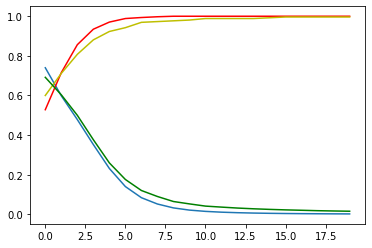

In [ ]:
plt.figure()
plt.plot(H.history["loss"])
plt.plot(H.history["accuracy"], c='r')
plt.plot(H.history["val_accuracy"], c='y')
plt.plot(H.history["val_loss"], c='g')
plt.show()

In [ ]:
##GRUPO 2

In [ ]:
classifier2 = Sequential()
classifier2.add(Dense(10, input_shape=(27,), activation="relu"))
classifier2.add(Dense(10, activation="relu"))
classifier2.add(Dense(units = 1, activation = 'sigmoid'))
classifier2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
H2 = classifier2.fit(X_train2, y_train2, batch_size = 10, epochs = 20, validation_data = (X_test2, y_test2))

Epoch 1/20
78/78 [==============================] - 1s 4ms/step - loss: 0.6784 - accuracy: 0.5551 - val_loss: 0.6825 - val_accuracy: 0.5885
Epoch 2/20
78/78 [==============================] - 0s 1ms/step - loss: 0.6275 - accuracy: 0.6872 - val_loss: 0.6435 - val_accuracy: 0.6769
Epoch 3/20
78/78 [==============================] - 0s 1ms/step - loss: 0.5625 - accuracy: 0.7718 - val_loss: 0.5861 - val_accuracy: 0.7654
Epoch 4/20
78/78 [==============================] - 0s 2ms/step - loss: 0.4761 - accuracy: 0.8641 - val_loss: 0.4918 - val_accuracy: 0.8269
Epoch 5/20
78/78 [==============================] - 0s 1ms/step - loss: 0.3628 - accuracy: 0.9231 - val_loss: 0.3640 - val_accuracy: 0.9077
Epoch 6/20
78/78 [==============================] - 0s 2ms/step - loss: 0.2372 - accuracy: 0.9679 - val_loss: 0.2366 - val_accuracy: 0.9423
Epoch 7/20
78/78 [==============================] - 0s 1ms/step - loss: 0.1358 - accuracy: 0.9795 - val_loss: 0.1483 - val_accuracy: 0.9500
Epoch 8/20
78/78 [==

In [ ]:
y_pred_rn2 = classifier2.predict(X_test2)
y_pred_rn2 = np.round(abs(y_pred_rn2))
y_pred_rn2 = y_pred_rn2.astype('int64')

In [ ]:
y_pred_total = np.append(y_pred_total, y_pred_rn2)

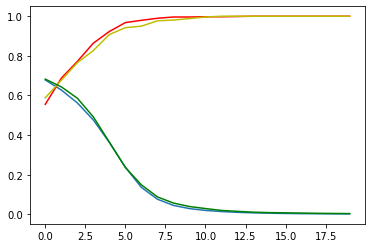

In [ ]:
plt.figure()
plt.plot(H2.history["loss"])
plt.plot(H2.history["accuracy"], c='r')
plt.plot(H2.history["val_accuracy"], c='y')
plt.plot(H2.history["val_loss"], c='g')
plt.show()

In [ ]:
##GRUPO 3

In [ ]:
classifier3 = Sequential()
classifier3.add(Dense(10, input_shape=(27,), activation="relu"))
classifier3.add(Dense(10, activation="relu"))
classifier3.add(Dense(units = 1, activation = 'sigmoid'))
classifier3.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
H3 = classifier3.fit(X_train3, y_train3, batch_size = 10, epochs = 20, validation_data = (X_test3, y_test3))

Epoch 1/20
78/78 [==============================] - 1s 3ms/step - loss: 0.6795 - accuracy: 0.5795 - val_loss: 0.6178 - val_accuracy: 0.7385
Epoch 2/20
78/78 [==============================] - 0s 1ms/step - loss: 0.5853 - accuracy: 0.7462 - val_loss: 0.5505 - val_accuracy: 0.8462
Epoch 3/20
78/78 [==============================] - 0s 1ms/step - loss: 0.4771 - accuracy: 0.8551 - val_loss: 0.4611 - val_accuracy: 0.9000
Epoch 4/20
78/78 [==============================] - 0s 1ms/step - loss: 0.3498 - accuracy: 0.9192 - val_loss: 0.3368 - val_accuracy: 0.9385
Epoch 5/20
78/78 [==============================] - 0s 1ms/step - loss: 0.2211 - accuracy: 0.9641 - val_loss: 0.2299 - val_accuracy: 0.9577
Epoch 6/20
78/78 [==============================] - 0s 1ms/step - loss: 0.1230 - accuracy: 0.9897 - val_loss: 0.1530 - val_accuracy: 0.9769
Epoch 7/20
78/78 [==============================] - 0s 1ms/step - loss: 0.0654 - accuracy: 0.9962 - val_loss: 0.1063 - val_accuracy: 0.9808
Epoch 8/20
78/78 [==

In [ ]:
y_pred_rn3 = classifier3.predict(X_test3)
y_pred_rn3 = np.round(abs(y_pred_rn3))
y_pred_rn3 = y_pred_rn3.astype('int64')

In [ ]:
y_pred_total = np.append(y_pred_total, y_pred_rn3)

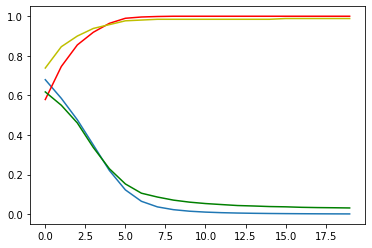

In [ ]:
plt.figure()
plt.plot(H3.history["loss"])
plt.plot(H3.history["accuracy"], c='r')
plt.plot(H3.history["val_accuracy"], c='y')
plt.plot(H3.history["val_loss"], c='g')
plt.show()

In [ ]:
##GRUPO 4

In [ ]:
classifier4 = Sequential()
classifier4.add(Dense(10, input_shape=(27,), activation="relu"))
classifier4.add(Dense(10, activation="relu"))
classifier4.add(Dense(units = 1, activation = 'sigmoid'))
classifier4.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
H4 = classifier4.fit(X_train4, y_train4, batch_size = 10, epochs = 20, validation_data = (X_test4, y_test4))

Epoch 1/20
78/78 [==============================] - 1s 3ms/step - loss: 0.6548 - accuracy: 0.5744 - val_loss: 0.6709 - val_accuracy: 0.6462
Epoch 2/20
78/78 [==============================] - 0s 1ms/step - loss: 0.5270 - accuracy: 0.8090 - val_loss: 0.5629 - val_accuracy: 0.7885
Epoch 3/20
78/78 [==============================] - 0s 1ms/step - loss: 0.3840 - accuracy: 0.9397 - val_loss: 0.4222 - val_accuracy: 0.8731
Epoch 4/20
78/78 [==============================] - 0s 1ms/step - loss: 0.2429 - accuracy: 0.9692 - val_loss: 0.2897 - val_accuracy: 0.9192
Epoch 5/20
78/78 [==============================] - 0s 1ms/step - loss: 0.1409 - accuracy: 0.9872 - val_loss: 0.1955 - val_accuracy: 0.9500
Epoch 6/20
78/78 [==============================] - 0s 2ms/step - loss: 0.0805 - accuracy: 0.9936 - val_loss: 0.1297 - val_accuracy: 0.9692
Epoch 7/20
78/78 [==============================] - 0s 1ms/step - loss: 0.0462 - accuracy: 0.9974 - val_loss: 0.0892 - val_accuracy: 0.9808
Epoch 8/20
78/78 [==

In [ ]:
y_pred_rn4 = classifier4.predict(X_test4)
y_pred_rn4 = np.round(abs(y_pred_rn4))
y_pred_rn4 = y_pred_rn4.astype('int64')

In [ ]:
y_pred_total = np.append(y_pred_total, y_pred_rn4)

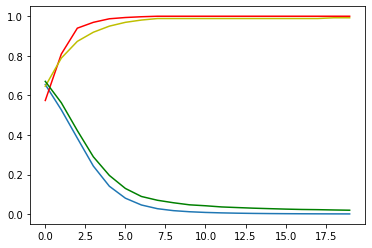

In [ ]:
plt.figure()
plt.plot(H4.history["loss"])
plt.plot(H4.history["accuracy"], c='r')
plt.plot(H4.history["val_accuracy"], c='y')
plt.plot(H4.history["val_loss"], c='g')
plt.show()

In [ ]:
# Acurácia SVM RBF
print("Acurácia RNA 10-10", accuracy_score(y_total, y_pred_total))

Acurácia RNA 10-10 0.9942307692307693


In [ ]:
print(confusion_matrix(y_total,y_pred_total))
print(classification_report(y_total,y_pred_total))  
print("Acurácia RBF:", accuracy_score(y_total, y_pred_total))

[[517   3]
 [  3 517]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       520
           1       0.99      0.99      0.99       520

    accuracy                           0.99      1040
   macro avg       0.99      0.99      0.99      1040
weighted avg       0.99      0.99      0.99      1040

Acurácia RBF: 0.9942307692307693


In [ ]:
###################################################

In [ ]:
###################################################

In [ ]:
#Agora o teste será realizado em um dataset com 6 exames de 28 pacientes com Parkinson, todos com a doença
# Serão 168 instancias (6 exames x 28 pacientes) embaralhadas

In [ ]:
PD = pd.read_csv('test_data.csv')
del PD['paciente']
del PD['Exame']

In [ ]:
y_final = PD.Sick
X_final = PD

In [ ]:
X_final, y_final = embaralha(X_final, y_final)

In [ ]:
X_final = sc.fit_transform(X_final)
print(X_final.shape, y_final.shape)

(168, 27) (168,)


In [ ]:
#GRUPO 1

for modelo in (modelo_SvmLin, modelo_SvmPoly, modelo_SvmRBF, model_KNN):
    name = modelo
    y_pred_name = modelo.predict(X_final)
    print("Acurácia", modelo.__class__.__name__,  accuracy_score(y_final, y_pred_name))
    print(classification_report(y_final,y_pred_name))

Acurácia SVC 0.5416666666666666
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.54      0.70       168

    accuracy                           0.54       168
   macro avg       0.50      0.27      0.35       168
weighted avg       1.00      0.54      0.70       168

Acurácia SVC 0.5892857142857143
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.59      0.74       168

    accuracy                           0.59       168
   macro avg       0.50      0.29      0.37       168
weighted avg       1.00      0.59      0.74       168

Acurácia SVC 0.4226190476190476
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.42      0.59       168

    accuracy                           0.42       168
   macro avg       0.50      0.2

/home/mariohn/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mariohn/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mariohn/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mariohn/anaconda3/lib/python3.7/site-packages/

In [ ]:
#GRUPO 2

for modelo in (modelo_SvmLin2, modelo_SvmPoly2, modelo_SvmRBF2, model_KNN2):
    name = modelo
    y_pred_name = modelo.predict(X_final)
    print("Acurácia", modelo.__class__.__name__,  accuracy_score(y_final, y_pred_name))
    print(classification_report(y_final,y_pred_name))

Acurácia SVC 0.5357142857142857
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.54      0.70       168

    accuracy                           0.54       168
   macro avg       0.50      0.27      0.35       168
weighted avg       1.00      0.54      0.70       168

Acurácia SVC 0.5476190476190477
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.55      0.71       168

    accuracy                           0.55       168
   macro avg       0.50      0.27      0.35       168
weighted avg       1.00      0.55      0.71       168

Acurácia SVC 0.47023809523809523
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.47      0.64       168

    accuracy                           0.47       168
   macro avg       0.50      0.

/home/mariohn/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mariohn/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mariohn/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mariohn/anaconda3/lib/python3.7/site-packages/

In [ ]:
#GRUPO 3

for modelo in (modelo_SvmLin3, modelo_SvmPoly3, modelo_SvmRBF3, model_KNN3):
    modelo.fit(X_train3, y_train3)
    name = modelo
    y_pred_name = modelo.predict(X_final)
    print("Acurácia", modelo.__class__.__name__,  accuracy_score(y_final, y_pred_name))
    print(classification_report(y_final,y_pred_name))

Acurácia SVC 0.3869047619047619
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.39      0.56       168

    accuracy                           0.39       168
   macro avg       0.50      0.19      0.28       168
weighted avg       1.00      0.39      0.56       168

Acurácia SVC 0.20833333333333334
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.21      0.34       168

    accuracy                           0.21       168
   macro avg       0.50      0.10      0.17       168
weighted avg       1.00      0.21      0.34       168

Acurácia SVC 0.40476190476190477
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.40      0.58       168

    accuracy                           0.40       168
   macro avg       0.50      0

/home/mariohn/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mariohn/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mariohn/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Acurácia KNeighborsClassifier 0.48214285714285715
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.48      0.65       168

    accuracy                           0.48       168
   macro avg       0.50      0.24      0.33       168
weighted avg       1.00      0.48      0.65       168



/home/mariohn/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#GRUPO 4

for modelo in (modelo_SvmLin4, modelo_SvmPoly4, modelo_SvmRBF4, model_KNN4):
    name = modelo
    y_pred_name = modelo.predict(X_final)
    print("Acurácia", modelo.__class__.__name__,  accuracy_score(y_final, y_pred_name))
    print(classification_report(y_final,y_pred_name))

Acurácia SVC 0.5
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.50      0.67       168

    accuracy                           0.50       168
   macro avg       0.50      0.25      0.33       168
weighted avg       1.00      0.50      0.67       168

Acurácia SVC 0.5357142857142857
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.54      0.70       168

    accuracy                           0.54       168
   macro avg       0.50      0.27      0.35       168
weighted avg       1.00      0.54      0.70       168

Acurácia SVC 0.5833333333333334
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.58      0.74       168

    accuracy                           0.58       168
   macro avg       0.50      0.29      0.37    

/home/mariohn/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mariohn/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mariohn/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Acurácia KNeighborsClassifier 0.6011904761904762
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.60      0.75       168

    accuracy                           0.60       168
   macro avg       0.50      0.30      0.38       168
weighted avg       1.00      0.60      0.75       168



/home/mariohn/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#################################

In [ ]:
#TESTE GRUPO 1 RNA
T = classifier.fit(X_train, y_train, batch_size = 10, epochs = 20, validation_data = (X_final, y_final))

Epoch 1/20
78/78 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.8163 - val_accuracy: 0.6667
Epoch 2/20
78/78 [==============================] - 0s 1ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.8176 - val_accuracy: 0.6607
Epoch 3/20
78/78 [==============================] - 0s 1ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.8189 - val_accuracy: 0.6607
Epoch 4/20
78/78 [==============================] - 0s 1ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.8210 - val_accuracy: 0.6548
Epoch 5/20
78/78 [==============================] - 0s 1ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.8194 - val_accuracy: 0.6548
Epoch 6/20
78/78 [==============================] - 0s 1ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.8206 - val_accuracy: 0.6607
Epoch 7/20
78/78 [==============================] - 0s 1ms/step - loss: 9.1987e-04 - accuracy: 1.0000 - val_loss: 0.8195 - val_accuracy: 0.6607
Epoch 8/20
78/78

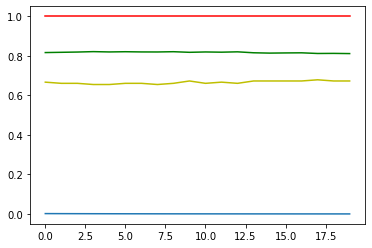

In [ ]:
plt.figure()
plt.plot(T.history["loss"])
plt.plot(T.history["accuracy"], c='r')
plt.plot(T.history["val_accuracy"], c='y')
plt.plot(T.history["val_loss"], c='g')
plt.show()

In [ ]:
#TESTE GRUPO 2 RNA
T2 = classifier2.fit(X_train2, y_train2, batch_size = 10, epochs = 20, validation_data = (X_final, y_final))

Epoch 1/20
78/78 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.5958 - val_accuracy: 0.7083
Epoch 2/20
78/78 [==============================] - 0s 1ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.5971 - val_accuracy: 0.7024
Epoch 3/20
78/78 [==============================] - 0s 1ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.5952 - val_accuracy: 0.6905
Epoch 4/20
78/78 [==============================] - 0s 1ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.5919 - val_accuracy: 0.7024
Epoch 5/20
78/78 [==============================] - 0s 1ms/step - loss: 9.4768e-04 - accuracy: 1.0000 - val_loss: 0.5906 - val_accuracy: 0.7024
Epoch 6/20
78/78 [==============================] - 0s 1ms/step - loss: 8.4269e-04 - accuracy: 1.0000 - val_loss: 0.5937 - val_accuracy: 0.6964
Epoch 7/20
78/78 [==============================] - 0s 1ms/step - loss: 7.5430e-04 - accuracy: 1.0000 - val_loss: 0.5938 - val_accuracy: 0.6905
Epoch 8/

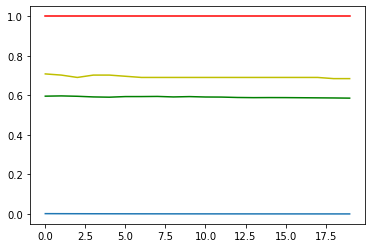

In [ ]:
plt.figure()
plt.plot(T2.history["loss"])
plt.plot(T2.history["accuracy"], c='r')
plt.plot(T2.history["val_accuracy"], c='y')
plt.plot(T2.history["val_loss"], c='g')
plt.show()

In [ ]:
#TESTE GRUPO 3 RNA
T3 = classifier3.fit(X_train3, y_train3, batch_size = 10, epochs = 20, validation_data = (X_final, y_final))

Epoch 1/20
78/78 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.9301 - val_accuracy: 0.3095
Epoch 2/20
78/78 [==============================] - 0s 1ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.9438 - val_accuracy: 0.3095
Epoch 3/20
78/78 [==============================] - 0s 1ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.9505 - val_accuracy: 0.3155
Epoch 4/20
78/78 [==============================] - 0s 1ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.9566 - val_accuracy: 0.3095
Epoch 5/20
78/78 [==============================] - 0s 1ms/step - loss: 9.0163e-04 - accuracy: 1.0000 - val_loss: 0.9621 - val_accuracy: 0.3095
Epoch 6/20
78/78 [==============================] - 0s 1ms/step - loss: 8.1127e-04 - accuracy: 1.0000 - val_loss: 0.9700 - val_accuracy: 0.3036
Epoch 7/20
78/78 [==============================] - 0s 1ms/step - loss: 7.3096e-04 - accuracy: 1.0000 - val_loss: 0.9778 - val_accuracy: 0.3036
Epoch 8/

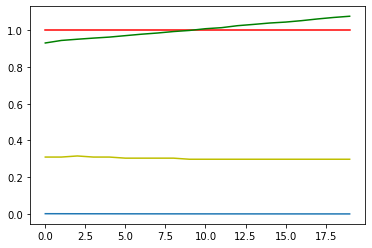

In [ ]:
plt.figure()
plt.plot(T3.history["loss"])
plt.plot(T3.history["accuracy"], c='r')
plt.plot(T3.history["val_accuracy"], c='y')
plt.plot(T3.history["val_loss"], c='g')
plt.show()

In [ ]:
#TESTE GRUPO 4 RNA
T4 = classifier4.fit(X_train4, y_train4, batch_size = 10, epochs = 20, validation_data = (X_final, y_final))

Epoch 1/20
78/78 [==============================] - 0s 3ms/step - loss: 9.0778e-04 - accuracy: 1.0000 - val_loss: 0.9040 - val_accuracy: 0.5238
Epoch 2/20
78/78 [==============================] - 0s 1ms/step - loss: 7.8394e-04 - accuracy: 1.0000 - val_loss: 0.9068 - val_accuracy: 0.5298
Epoch 3/20
78/78 [==============================] - 0s 1ms/step - loss: 6.8147e-04 - accuracy: 1.0000 - val_loss: 0.9038 - val_accuracy: 0.5298
Epoch 4/20
78/78 [==============================] - 0s 1ms/step - loss: 5.9798e-04 - accuracy: 1.0000 - val_loss: 0.9072 - val_accuracy: 0.5298
Epoch 5/20
78/78 [==============================] - 0s 1ms/step - loss: 5.2809e-04 - accuracy: 1.0000 - val_loss: 0.8971 - val_accuracy: 0.5357
Epoch 6/20
78/78 [==============================] - 0s 1ms/step - loss: 4.6773e-04 - accuracy: 1.0000 - val_loss: 0.9012 - val_accuracy: 0.5357
Epoch 7/20
78/78 [==============================] - 0s 1ms/step - loss: 4.1773e-04 - accuracy: 1.0000 - val_loss: 0.9029 - val_accuracy:

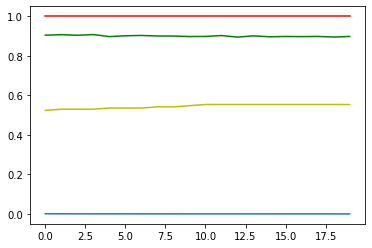

In [ ]:
plt.figure()
plt.plot(T4.history["loss"])
plt.plot(T4.history["accuracy"], c='r')
plt.plot(T4.history["val_accuracy"], c='y')
plt.plot(T4.history["val_loss"], c='g')
plt.show()